# Algoritmus PISO

ISSA, R.I. Solution of the implicitly discretised fluid flow equations by operator-splitting. Journal of Computational Physics [online]. 1986, 62(1), 40–65 [vid. 2016-08-24]. ISSN 00219991. Dostupné z: doi:10.1016/0021-9991(86)90099-9

Pressure Implicit with Operator Splitting

## Základ odvození pro proudění nestlačitelné tekutiny


Uvažujeme Navierovy-Stokesovy rovnice pro připad nestlačitelné tekutiny s konstantní hustotou $\rho$:
\begin{align*}
    \rho \left(\frac{\partial \vec{u}}{\partial t} + \nabla\cdot(\vec{u}\otimes\vec{u}) - \nabla\cdot(\nu\nabla\vec{u})\right) &= - \nabla p, \\
    \nabla\cdot\vec{u} &= 0,
\end{align*}

Nejprve naznačíme základní myšlenku odvození. Později provedeme odvození pečlivěji pro plně diskretizovaný systém N-S rovnic.

Provedeme diskretizaci v čase s časovým krokem $\tau$. Konvektivní i vazké členy zahrneme do operátoru $G$, takže
\begin{align*}
 \frac{\rho}{\tau}(\vec{u}^n-\vec{u}^o) &= \vec{G}(\vec{u}^n) - \nabla p^n, \\
 \nabla\cdot\vec{u}^n &= 0
\end{align*}


Tyto rovnici je obtížné vyřešit (museli bychom řešit současně jak pro $p$, tak pro $\vec{u}$). Proto provedeme nejprve odhad rychlosti se starou hodnotou tlaku.

### Prediktor

\begin{align*}
 \frac{\rho}{\tau}(\vec{u}^*-\vec{u}^o) &= \vec{G}(\vec{u}^*) - \nabla p^o
\end{align*}

Takto získané $\vec{u}^*$ nesplňuje rovnici kontinuity! Proto musíme tuto rychlost opravit.

### První korektor
Napíšeme si rovnici pro opravenou rychlost s horním indexem $**$ a opravený tlak s $*$:
\begin{align*}
 \frac{\rho}{\tau}(\vec{u}^{**}-\vec{u}^o) &= \vec{G}(\vec{u}^*) - \nabla p^*, \\
 \nabla \cdot \vec{u}^{**} &= 0.
\end{align*}
V operátoru $G$ ponecháme $\vec{u}^*$! Je to podobné jako vyškrtnutí $H(u')$ v algoritmu SIMPLE.

Na první rovnici aplikujeme operátor divergence a s využitím rovnice kontinuity dostáváme 

\begin{align*}
 -\frac{\rho}{\tau}\nabla\cdot \vec{u}^o &= \nabla \cdot \vec{G}(\vec{u}^*) - \Delta p^*,
\end{align*}

tedy

\begin{align*}
 \Delta p^* &= \nabla \cdot \vec{G}(\vec{u}^*) + \frac{\rho}{\tau}\nabla\cdot \vec{u}^o.
\end{align*}

Rychlost $\vec{u}^{**}$ pak získáme dosazením $p^*$ do první rovnice, tedy
\begin{align*}
 \vec{u}^{**} &= \vec{u}^o + \frac{\tau}{\rho} \vec{G}(\vec{u}^*) - \frac{\tau}{\rho} \nabla p^*.
\end{align*}


- $\vec{u}^{**}$ splňuje rovnici kontinuity
- v rovnici pro hybnost je ale $G(u^*)$ místo $G(u^{**})$


### Druhý korektor
\begin{align*}
 \frac{\rho}{\tau}(\vec{u}^{***}-\vec{u}^o) &= \vec{G}(\vec{u}^{**}) - \nabla p^{**}, \\
 \nabla \cdot \vec{u}^{***} &= 0.
\end{align*}

opět aplikujeme divergenci na první rovnici a s použitím rovnice kontinuity dostáváme

\begin{align*}
 \Delta p^{**} &= \nabla \cdot \vec{G}(\vec{u}^{**}) + \frac{\rho}{\tau}\nabla\cdot \vec{u}^o
\end{align*}

Rychlost $\vec{u}^{***}$ pak získáme podobně jako minule dosazením $p^{**}$ do první rovnice, tedy
\begin{align*}
 \vec{u}^{***} &= \vec{u}^o + \frac{\tau}{\rho} \vec{G}(\vec{u}^{**}) - \frac{\tau}{\rho} \nabla p^{**}.
\end{align*}

### Třetí korektor, čtvrtý korektor, ....
Stejným způsobem provádíme další korektorové kroky. 

## Analýza přesnosti pro lineární problém 

- $\vec{\epsilon}^k = \vec{u}^{n}-\vec{u}^{k}$ kde $k=*,**,***,...$, tj. $\vec{\epsilon}^* = \vec{u}^{n}-\vec{u}^*$
- $\eta^l = p^{n}-p^{l}$ kde $l=o,*,**,...$, tj. $\eta^* = p^{n}-p^*$
- $G$ lineární
- $\vec{u}^o$ splňuje rovnici kontinuity

Odečtením diskretizované NS rovnice od prediktoru dostáváme
\begin{align*}
  \frac{\rho}{\tau} \vec{\epsilon}^* &= \vec{G}(\vec{\epsilon}^*) -\nabla \eta^o
\end{align*}

ale
$$
    \eta^o = p^{n} - p^o = O(\tau)
$$
a tedy
$$
    \vec{\epsilon}^* = O(\tau^2).
$$

Z prvního korektoru
$$
    \Delta \eta^* = \nabla \cdot \vec{G}(\vec{\epsilon}^*)
$$
a tedy $\eta^* = O(\tau^2)$ a $\vec{\epsilon}^{**} = O(\tau^3)$

Z druhého a korektoru analogicky $\eta^{**} = O(\tau^3)$ a $\vec{\epsilon}^{***} = O(\tau^4)$ ...

Neboli v s každým korektorem se exponent u $\tau$ v odhadu chyby zvýší o jedna. Pokud jsme použili v čase diskretizaci prvního řádu (tj. s chybou $O(\tau)$), po prvním korektoru by měla být chyba PISO algoritmu srovnatelná s chybou diskretizace. 

Odvození bylo však provedeno pro lineární případ. Navíc symbol $O(\tau^k)$ říká jen, že existuje $K>0$ takové, že chyba je menší než $K\tau^k$. Tuto konstantu však neznáme. Proto se běžně provádějí minimálně 2-3 korektorové kroky.


## Algoritmus PISO pro plně diskretizovaný systém

Provedeme nyní odvození pro plně diskretizovaný systém Navierových-Stokesových rovnic. Prostorovou diskretizaci provedeme pomoci MKO. Podobně jako u algoritmu SIMPLE budeme pracovat s proměnnými definovanými ve středech buňek $\vec{u}$, $p$ a s pomocnými proměnnými $\phi$ definovanými ve středech stěn.

Diskretizujeme levou stranu rovnice pro rychlost, gradient tlaku opět prozatím ponecháme nediskretizovaný. 
$$
a_C^o \vec{u}_C^* = \sum_{f} a_F^o \vec{u}^*_F + \vec{Q}_C - \nabla p_C^o = H(\vec{u}^*)_C - \nabla p_C^o.
$$
Formálně je to stejný krok, jako u algoritmu SIMPLE. Na rozdíl od algoritmu SIMPLE však člen $a_C^o$ obsahuje navíc příspěvek od operátoru $\partial/\partial t$, tedy $1/\tau$. Ve členu $Q_c$ se pak objeví (mimo jiné) $\vec{u}^o/\Delta t$.

Provedeme diskretizaci gradientu tlaku a vypočteme $\vec{u}^*$. V korektorovém kroku pokračujeme podobně jako v algoritmu SIMPLE. Definujeme
$$
\hat{u}_C^* := \frac{1}{a_C^o} H(\vec{u}^*)_C
$$
a tuto "pseudorychlost" interpolujeme na stěny sítě a máme
$$
\vec{u}_f^* = \hat{u}_f^* - \frac{1}{a_f^o}\nabla p_f^o.
$$

Pro korigovanou rychlost $\vec{u}^{**}$ má platit
$$
\vec{u}_f^{**} = \hat{u}_f^* - \frac{1}{a_f^o}\nabla p_f^*.
$$

a tedy z rovnice kontinuity pro $\vec{u}^{**}$ je
$$
\sum_f \frac{1}{a_f^o}\nabla p_f^* \cdot \vec{S}_f = \sum_f \hat{u}_f^* \cdot \vec{S}_f.
$$

Nakonec určíme rychlost $\vec{u}^{**}$
$$
\vec{u}_C^{**} = \hat{u}_C^* - \frac{1}{a_C^o}\nabla p_C^*.
$$

Současně určíme $\phi^{**}_f$ jako
$$
\phi_f^{**} = \vec{S}_f\cdot\hat{u}_f^* - \frac{1}{a_C^f}\frac{\partial p_f^*}{\partial n} ||\vec{S}_f||.
$$

Další korektorové kroky se dělají analogicky.

Povšimněte si velké podobnosti s algoritmem SIMPLE. Na rozdíl od SIMPLE však není v PISO algoritmu relaxace. Ostrou diagonální dominanci matice pro rychlost zajišťuje příspěvek od časové derivace $\frac{1}{\tau}$.


In [1]:
using PyPlot

In [2]:
include("mesh.jl");
include("fields.jl");
include("operators.jl");

In [3]:
function div(ϕ::ScalarList , U::Field{T}) where {T}
    @assert length(ϕ) == length(U.mesh.owner)
    
    A = spzeros(length(U.values),length(U.values))
    b = zeros(T, length(U.values))
    
    mesh = U.mesh
    
    for f in internal_faces(mesh)
        o = mesh.owner[f]
        n = mesh.neighbor[f]
    
        α = max(ϕ[f], 0.0)
        β = min(ϕ[f], 0.0)
        
        A[o,o] += α / mesh.volume[o]
        A[o,n] += β / mesh.volume[o]
            
        A[n,o] -= α / mesh.volume[n]
        A[n,n] -= β / mesh.volume[n]
    end

    for p in boundary_patches(mesh)
        name = mesh.patch[p].name
        bc = U.boundaries[name]
        for f in patch_faces(mesh, p)
            o = mesh.owner[f]
            c1, c2 = boundary_coeffs(bc, f) 
            α = max(ϕ[f], 0.0)
            β = min(ϕ[f], 0.0)

            A[o,o] += (α + β*c2) / mesh.volume[o]
            b[o]   += β*c1 / mesh.volume[o]
        end
    end

    
    return Equation{T}(A, U.values, b)
end     

div (generic function with 2 methods)

In [4]:
function create_fields(mesh)
    U = VectorField(mesh)
    set_dirichlet_patch!(U, "left", Vector(0,0));
    set_dirichlet_patch!(U, "right", Vector(0,0));
    set_dirichlet_patch!(U, "bottom", Vector(0,0));
    set_dirichlet_patch!(U, "top", Vector(1,0));

    p = ScalarField(mesh);
    for name ∈ ["left", "right", "bottom", "top"]
        set_neumann_patch!(p, name)
    end

    return (U,p)
end;

In [5]:
function create_ϕ_by_interpolation(U::VectorField)
    mesh = U.mesh
    ϕ = zeros(Scalar, length(all_faces(mesh)))
    
    for f in internal_faces(mesh)
        o = mesh.owner[f]
        n = mesh.neighbor[f]
        ϕ[f] = dot(mesh.surface[f], (U[o] + U[n]) / 2)
    end

    for p in boundary_patches(mesh)
        name = mesh.patch[p].name
        bc = U.boundaries[name]
        for f in patch_faces(mesh, p)
            o = mesh.owner[f]
            Uf = boundary_value(bc, f)
            ϕ[f] = dot(mesh.surface[f], Uf)
        end
    end

    return ϕ
end

create_ϕ_by_interpolation (generic function with 1 method)

In [6]:
function calculate_ϕ!(ϕ::ScalarList, Ubar::VectorField, p::ScalarField, ra::ScalarList)
    mesh = Ubar.mesh
    for f in internal_faces(mesh)
        o = mesh.owner[f]
        n = mesh.neighbor[f]
        S = mesh.surface[f]
        δ = norm(mesh.centre[n] - mesh.centre[o])
        pn = (p[n] - p[o]) / δ
        ϕ[f] = dot(S, (Ubar[o]+Ubar[n])/2.) - (ra[o]+ra[n])/2 * pn * norm(S)
    end

    for pa in boundary_patches(mesh)
        name = mesh.patch[pa].name
        bc  = Ubar.boundaries[name]
        pbc = p.boundaries[name]
        for f in patch_faces(mesh, pa)
            o = mesh.owner[f]
            S = mesh.surface[f]
            Ub = boundary_value(bc, f)
            pb = boundary_value(pbc, f)
            pn = (pb - p[o]) / norm(mesh.centre[o] - mesh.facecentre[f])
            ϕ[f] = dot(S, Ub) - ra[o] * pn
        end
    end

end

calculate_ϕ! (generic function with 1 method)

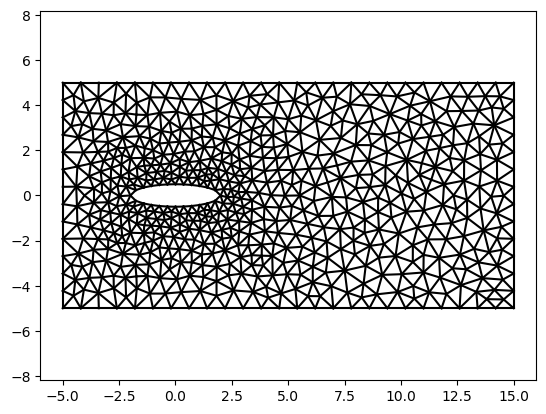

In [7]:
include("gmsh_mesh.jl")

gmsh = gmsh_mesh("domain.msh");

plot_mesh(gmsh);
axis("equal");

In [8]:
function ddt(U::Field{T}, Uold::Field{T}, Δt::Scalar) where {T}
    n = length(Uold.values)
    b = - Uold.values / Δt
    return Equation{T}(sparse(I/Δt,n,n), U.values, b)
end     

ddt (generic function with 2 methods)

In [9]:
function PISO(U, p, ν, Δt, steps)
    local ϕ = create_ϕ_by_interpolation(U)
    Uold = VectorField(U.mesh)
    
    for n=1:steps
        Uold ← U

        UEqn = ddt(U, Uold, Δt) + div(ϕ,U) - Δ(ν,U)
        
        # Prediktor
        solve!(UEqn + grad(p))

        # Prvni korektor
        ra = 1 ./ Ac(UEqn)        
        Ubar = VectorField(ra .* H(UEqn), U.mesh, U.boundaries);
        pEqn = Δ(ra, p) - div(Ubar);

        solve!(pEqn)
        calculate_ϕ!(ϕ, Ubar, p, ra)
        
        U ← Ubar - ra .* grad(p)

        # Druhy korektor
        UEqn = ddt(U, Uold, Δt) + div(ϕ,U) - Δ(ν,U)
        ra = 1 ./ Ac(UEqn)        
        Ubar = VectorField(ra .* H(UEqn), U.mesh, U.boundaries);
        pEqn = Δ(ra, p) - div(Ubar);

        solve!(pEqn)
        calculate_ϕ!(ϕ, Ubar, p, ra)
        
        U ← Ubar - ra .* grad(p)
    
    end

    return U,p
end

PISO (generic function with 1 method)

In [10]:
U = VectorField(gmsh)
set_dirichlet_patch!(U, "INLET", Vector(1,0));
set_dirichlet_patch!(U, "TOP", Vector(0,0));
set_dirichlet_patch!(U, "BOTTOM", Vector(0,0));
set_dirichlet_patch!(U, "PROFILE", Vector(0,0));
set_neumann_patch!(U, "OUTLET");
U.values[:] = [Vector(1,0) for c in cells(gmsh)]

p = ScalarField(gmsh);
for name ∈ ["INLET", "PROFILE", "TOP", "BOTTOM"]
    set_neumann_patch!(p, name)
end
set_dirichlet_patch!(p, "OUTLET", 0.0);

ν = 1.e-3

0.001

In [11]:
U, p = PISO(U, p, ν, 1.e-3, 100);

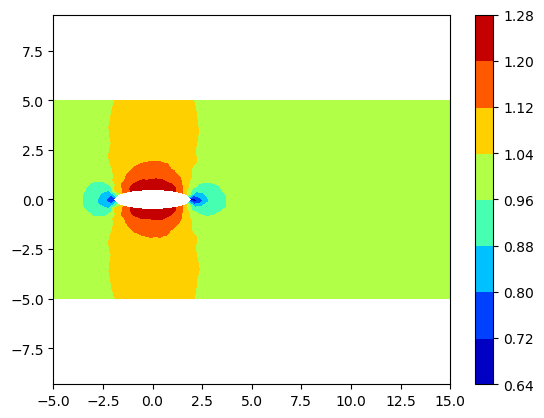

In [12]:
plot_contourf(U; cmap="jet"); colorbar();
axis("equal");

In [13]:
gmf = gmsh_mesh("domain_bl.msh");

In [14]:
Uf = VectorField(gmf)
set_dirichlet_patch!(Uf, "INLET", Vector(1,0));
set_dirichlet_patch!(Uf, "TOP", Vector(0,0));
set_dirichlet_patch!(Uf, "BOTTOM", Vector(0,0));
set_dirichlet_patch!(Uf, "PROFILE", Vector(0,0));
set_neumann_patch!(Uf, "OUTLET");
Uf.values[:] = [Vector(1,0) for c in cells(gmf)]

pf = ScalarField(gmf);
for name ∈ ["INLET", "PROFILE", "TOP", "BOTTOM"]
    set_neumann_patch!(pf, name)
end
set_dirichlet_patch!(pf, "OUTLET", 0.0);

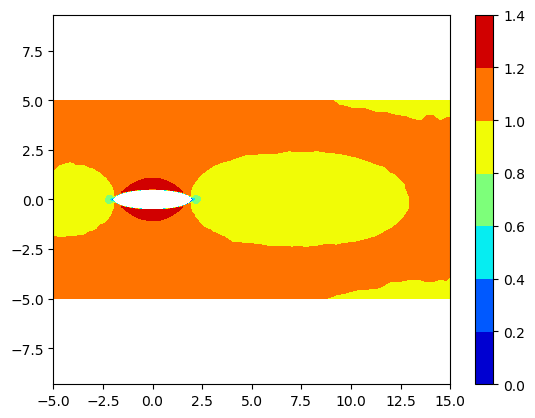

In [15]:
Uf, pf = PISO(Uf, pf, ν, 1.e-2, 10);
plot_contourf(Uf; cmap="jet"); colorbar();
axis("equal");

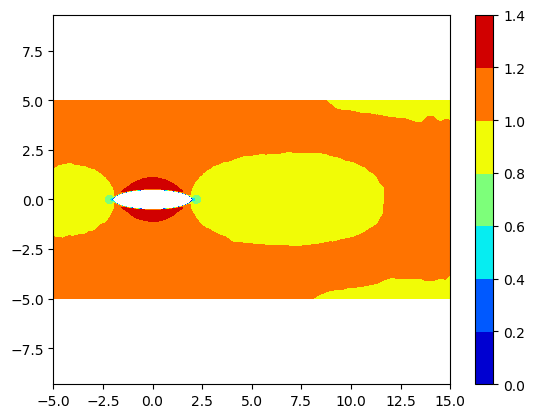

In [16]:
Uf, pf = PISO(Uf, pf, ν, 1.e-2, 10);
plot_contourf(Uf; cmap="jet"); colorbar();
axis("equal");

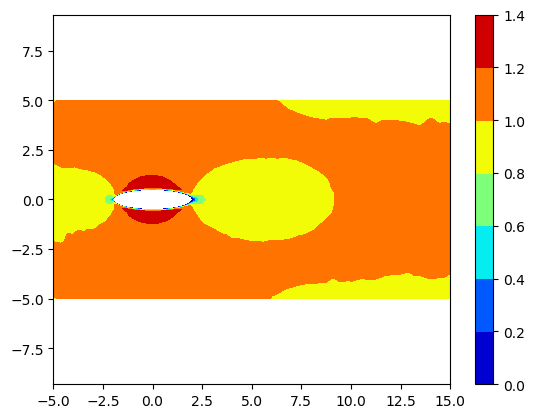

In [17]:
Uf, pf = PISO(Uf, pf, ν, 1.e-2, 100);
plot_contourf(Uf; cmap="jet"); colorbar();
axis("equal");

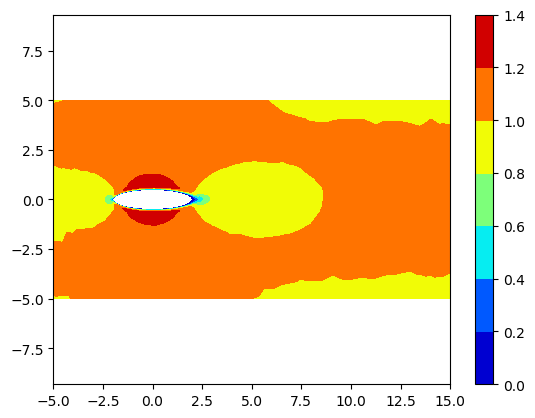

In [18]:
Uf, pf = PISO(Uf, pf, ν, 1.e-2, 100);
plot_contourf(Uf; cmap="jet"); colorbar();
axis("equal");